# Intro
In this assignement you will see a little example about
*   How to download a dataset
*   How to load it into dataframes
*   How to use extract basic features from the corpus
*   How to train a classifier on those features

You are advised to look at the code and understand it.

You will be then asked to perform feature extraction and classification yourself.

The task that will be addressed is document classification, specifically tasks related to sentiment classification.


# Document Classification Tutorial

## Preliminary Steps
These are some preliminary steps before addressing the task.
Import some basic libraries and set a variable that will be used in multiple steps.

In [1]:
# The libraries we will use are imported here, in case of runtime problems
import os, shutil  #  file management
import sys
import pandas as pd  #  dataframe management
import numpy as np  #  data manipulation

In [2]:
dataset_name = "aclImdb"

CHANGED: If it is necessary, clean all the data that are in the DATASETS directory and wipe out all the subdirectories.

IMPORTANT: DO NOT RUN THIS SECTION UNLESS YOU NEED IT.


In [3]:
#os.chdir('D:')

In [ ]:
folder = os.getcwd()

print("Current work directory: " + str(folder))

dataset_folder = os.path.join(os.getcwd(), "Datasets")

for filename in os.listdir(dataset_folder):
    file_path = os.path.join(dataset_folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

print("Cleaned")

## Dataset Download
Dowload the Imdb movie reviews dataset


In [4]:
import urllib.request  #  download files
import tarfile  #  unzip files

dataset_folder = os.path.join(os.getcwd(), "Datasets", "Original")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

url = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset_path = os.path.join(dataset_folder, "Movies.tar.gz")

if not os.path.exists(dataset_path):
    urllib.request.urlretrieve(url, dataset_path)
    print("Successful download")

tar = tarfile.open(dataset_path)
tar.extractall(dataset_folder)
tar.close()
print("Successful extraction")

Successful extraction


Look at the files you have downloaded to understand the structure of the dataset.

## Create the dataframe
Now the dataset is loaded into a dataframe to be more accessible.
During the creation some data will be printed as an example.

In [5]:
dataset_name = "aclImdb"

debug = True

dataframe_rows = []

for split in ['train', 'test']:
    for sentiment in ['pos', 'neg']:
        folder = os.path.join(os.getcwd(), "Datasets", "Original", dataset_name, split, sentiment)
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            try:
                if os.path.isfile(file_path):
                    # open the file
                    with open(file_path, mode='r', encoding='utf-8') as text_file:
                        # read it and extract informations
                        text = text_file.read()
                        score = filename.split("_")[1].split(".")[0]
                        file_id = filename.split("_")[0]

                        num_sentiment = -1

                        if sentiment == "pos" : num_sentiment = 1
                        elif sentiment == "neg" : num_sentiment = 0

                        # create single dataframe row
                        dataframe_row = {
                            "file_id": file_id,
                            "score": int(score),
                            "sentiment": num_sentiment,
                            "split": split,
                            "text": text
                        }

                        # print detailed info for the first file
                        if debug:
                            print(file_path)
                            print(filename)
                            print(file_id)
                            print(text)
                            print(score)
                            print(sentiment)
                            print(split)
                            print(dataframe_row)
                            debug = False
                        dataframe_rows.append(dataframe_row)

            except Exception as e:
                print('Failed to process %s. Reason: %s' % (file_path, e))
                sys.exit(0)

folder = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name)
if not os.path.exists(folder):
    os.makedirs(folder)

# transform the list of rows in a proper dataframe
dataframe = pd.DataFrame(dataframe_rows)
dataframe = dataframe[["file_id",
                       "score",
                       "sentiment",
                       "split",
                       "text"]]
dataframe_path = os.path.join(folder, dataset_name + ".pkl")
dataframe.to_pickle(dataframe_path)

D:\Datasets\Original\aclImdb\train\pos\0_9.txt
0_9.txt
0
Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!
9
pos
train
{'file_id': '0', 'score': 9, 'sentiment': 1, 'split': 'train', 'text': 'Bromwell High is a cartoon comedy. It ran at the sam

Little analysis of the dataframe

In [6]:
dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

print("Dataframe structure:")
print(df)
print()


print("Total rows %d" % (len(df)))
print()

column = 'score'
print("Distribution of scores: ")
print(df[column].value_counts())
print()

column = 'sentiment'
print("Distribution of sentiment: ")
print(df[column].value_counts())
print()


for split in ["train", "test"]:
    df1 = df.loc[df['split'] == split]
    column = 'score'
    print("Distribution of scores in %s: " % (split))
    print(df1[column].value_counts())
    print()

Dataframe structure:
      file_id  score  sentiment  split  \
0           0      9          1  train   
1       10000      8          1  train   
2       10001     10          1  train   
3       10002      7          1  train   
4       10003      8          1  train   
...       ...    ...        ...    ...   
49995    9998      1          0   test   
49996    9999      1          0   test   
49997     999      3          0   test   
49998      99      3          0   test   
49999       9      4          0   test   

                                                    text  
0      Bromwell High is a cartoon comedy. It ran at t...  
1      Homelessness (or Houselessness as George Carli...  
2      Brilliant over-acting by Lesley Ann Warren. Be...  
3      This is easily the most underrated film inn th...  
4      This is not the typical Mel Brooks film. It wa...  
...                                                  ...  
49995  I occasionally let my kids watch this garbage ...  
49

A little game: let's create a word cloud for the two sentiments and see if there is something interesting.

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

positive_corpus = df.loc[df['sentiment'] == 1]
positive_corpus = positive_corpus["text"].tolist()

negative_corpus = df.loc[df['sentiment'] == 0]
negative_corpus = negative_corpus["text"].tolist()

print("Negative:")
wordcloud1 = WordCloud(width = 3000, height = 2000, collocations=False, stopwords = STOPWORDS).generate(" ".join(negative_corpus))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud1) 
plt.axis("off");
plt.show()

print("Positive:")
wordcloud2 = WordCloud(width = 3000, height = 2000, collocations=False, stopwords = STOPWORDS).generate(" ".join(positive_corpus))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud2) 
plt.axis("off");
plt.show()

Is there something weird about these words? You can repeat the process multiple times to test your observations.
Is there something that will influence our approach? Think about it...

## Features extraction
Let's tackle the Sentiment Analysis task.

The scikit-learn library offers *TfidfVectorizer*, a class that performs both tokenization and the creation of the BoW representation (as tf-idf) of a corpus.

The class has plenty of options: it can be used also to count n-grams, excluding stop-words, and cutting off most and/or less frequent terms.

In [7]:
from sklearn.feature_extraction.text import  TfidfVectorizer

dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

# select only the training sentences
df_train = df.loc[df['split'] == "train"]

train_corpus = df_train['text'].tolist()

print("Processing corpus\n")
vectorizer =  TfidfVectorizer()
# tokenization and creation of Bag of Words representation
X_train = vectorizer.fit_transform(train_corpus)

print("Shape of the matrix: (data points, features)")
print(X_train.shape)
print()

# targets for the training set
Y_train = np.array(df_train['sentiment'].tolist())

Processing corpus

Shape of the matrix: (data points, features)
(25000, 74849)



Fitting on a corpus, the vectorizer creates an internal vocabulary that will be used to create the BoW representation.
The vocabulary is a dictionary that associates to each word a corresponding column in the feature matrix.

Do not try to print the whole vocabulary: it is quite large ;)

In [8]:
print(len(vectorizer.vocabulary_))

74849


Since the vocabulary will be quite big, by default X will be a *sparse* matrix (see scipy.sparse for more info).

In [9]:
print(X_train)

  (0, 34644)	0.047394461266444525
  (0, 50155)	0.08287028364871561
  (0, 72703)	0.027918294921852303
  (0, 24328)	0.09485779784272477
  (0, 23785)	0.04764802174958937
  (0, 66526)	0.03666458494606156
  (0, 2155)	0.06166887776124007
  (0, 1919)	0.07732854366244009
  (0, 40829)	0.03770129734051713
  (0, 23124)	0.0603023374239695
  (0, 72544)	0.08414563947065769
  (0, 74349)	0.040182759614367104
  (0, 46932)	0.02277311550313214
  (0, 57021)	0.10696882423195393
  (0, 30670)	0.03986001273006236
  (0, 33861)	0.09306596282618841
  (0, 38871)	0.0542382151436312
  (0, 12676)	0.05485981085044486
  (0, 53963)	0.11883065609615275
  (0, 32729)	0.0733604551139556
  (0, 19854)	0.044811917101658036
  (0, 9765)	0.09135539837480973
  (0, 68145)	0.06634799299330539
  (0, 54950)	0.09230806850172538
  (0, 63767)	0.15413528842651872
  :	:
  (24999, 32517)	0.08554199856842014
  (24999, 49147)	0.05530496122707191
  (24999, 3167)	0.03971086119358096
  (24999, 29999)	0.0441796905553389
  (24999, 47142)	0.087107

All the scipy tools are compatible with sparse matrices, but if you somehow need the traditional representation it is possible to convert it with the following command. Keep in mind that if the vocabulary and/or the dataset are large, the resulting array will be quite large, possibly occupying all the RAM.


```
X.toarray()
```



It is then possible to parse the test split likewise. Remember to use the transform function and not the fit_transform when working on the test set.

In [10]:
# select only the test sentences
df_test = df.loc[df['split'] == "test"]
test_corpus = df_test['text'].tolist()
X_test = vectorizer.transform(test_corpus)
Y_test = np.array(df_test['sentiment'].tolist())

## Training and Testing
It is now possible to choose one of the many models available in the sci-kit learn library, train it and test it.

In [11]:
# training and testing
from sklearn.svm import LinearSVC

classifier = LinearSVC()

classifier.fit(X_train, Y_train)

Y_pred_train = classifier.predict(X_train)
Y_pred_test = classifier.predict(X_test)

In [12]:
# print results
from sklearn.metrics import classification_report

report_train = classification_report(Y_train, Y_pred_train, target_names=["neg", "pos"])
report_test = classification_report(Y_test, Y_pred_test, target_names=["neg", "pos"])
print("Train")
print(report_train)
print("Test")
print(report_test)

Train
              precision    recall  f1-score   support

         neg       0.99      0.99      0.99     12500
         pos       0.99      0.99      0.99     12500

    accuracy                           0.99     25000
   macro avg       0.99      0.99      0.99     25000
weighted avg       0.99      0.99      0.99     25000

Test
              precision    recall  f1-score   support

         neg       0.87      0.89      0.88     12500
         pos       0.89      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



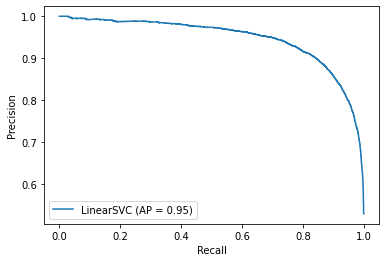

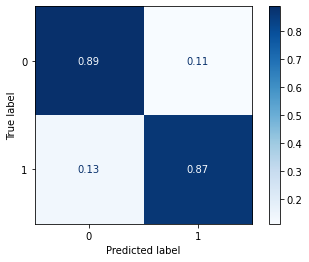

In [13]:
# more advanced tools
# plot precision/recall curve and confusion matrix
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, Y_test)
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")

# Now...do it yourself!

Now, rather then sentiment classification, try to address the task of score prediction on the same dataset: based on the text of the reviews, try to predict the score assigned by the reviewer.

## First part
As first part, experiment with the options of the vectorizer to improve the classification using logistic regression. You are required to look at the documentation of the functions.
You can also use or add other pre-processing step to the text if you feel like it, you are not obliged to use TfidfVectorizer.

Obviously, you will need to use the variable names declared in the first block.


Some notes:
* In the multi-class classification, the most important measures are F1s (especially macro and micro), since it is a complex measure given that considers more aspects than the simple accuracy.
* Between the problem as regression and the problem as multi-class classification, the priority is the problem as regression. Indeed, the classification perspective does penalize each error in the same way, while the regression perspective considers the difference between the predicted value and the real value (prediction 8 for real value 2 is way worse than prediction 3 for value 2). The classification perspective is a tool to understand the problem better and experiment. 
* There are no threshold values that you have to reach with the measurements to obtain a certain score. The score will be assigned considering the results of the class and the efforts we will see in the solution.
* In each code section, you have to deliver a single approach, but if you have observations or interesting alternative approaches, you can mention them in the .txt file

In [14]:
# write your code here
X_train = X_train
Y_train = np.array(df_train['score'].tolist())
X_test = X_test
Y_test = np.array(df_test['score'].tolist())

Now run the code below to train your classifier:

In [15]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000)

classifier.fit(X_train, Y_train)

Y_pred_test = classifier.predict(X_test)
Y_pred_test_class = np.around(Y_pred_test)

####################################################################

Now test your results running the code below:

R2 score 0.484457
MAE 1.468520
MSE 6.282360

              precision    recall  f1-score   support

           1       0.53      0.84      0.65      5022
           2       0.21      0.05      0.08      2302
           3       0.27      0.12      0.16      2541
           4       0.32      0.34      0.33      2635
           7       0.32      0.24      0.27      2307
           8       0.27      0.25      0.26      2850
           9       0.23      0.04      0.06      2344
          10       0.48      0.77      0.59      4999

    accuracy                           0.43     25000
   macro avg       0.33      0.33      0.30     25000
weighted avg       0.37      0.43      0.37     25000

[[4201  125  142  236   33   52    6  227]
 [1415  120  202  327   45   36    8  149]
 [1030  143  301  638  115   93   12  209]
 [ 715  110  278  891  221  181   20  219]
 [ 128   24   72  291  552  566   57  617]
 [ 141   11   47  173  430  699   80 1269]
 [ 113    8   28  102  155  470   88 1380]
 [ 

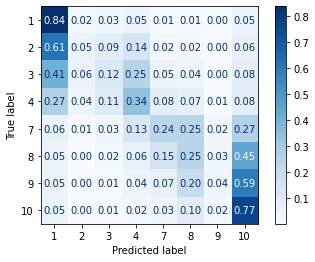

In [16]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


# task as regression

print("R2 score %f" % (r2_score(Y_test, Y_pred_test)))
print("MAE %f" % (mean_absolute_error(Y_test, Y_pred_test)))
print("MSE %f" % (mean_squared_error(Y_test, Y_pred_test)))
print()

# task as multiclass classification

report = classification_report(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(report)

confusion_matrix = confusion_matrix(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(confusion_matrix)
print()

# fancy confusion matrix
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")

####################################################################

## Second part
Now experiment both with the processing (the vectorizer) and the classifier to obtain the best result.

In [17]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Lemmatize the text
def preprocess_text_lemma(df):
    lemmatizer = WordNetLemmatizer()
    return [word.lower() for word in [lemmatizer.lemmatize(w) for w in [txt for txt in df]]]

# and Stem the text
def preprocess_text_stem(df):
    porter = PorterStemmer()
    return [porter.stem(w) for w in [txt for txt in df]]



dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

# select only the training sentences
df_train0 = df.loc[df['split'] == "train"]
df_train['text'] = preprocess_text_stem(preprocess_text_lemma(df_train0.iloc[:,4]))


train_corpus = df_train['text'].tolist()

print("Processing corpus\n")
vectorizer =  TfidfVectorizer()
# tokenization and creation of Bag of Words representation
X_train = vectorizer.fit_transform(train_corpus)

print("Shape of the matrix: (data points, features)")
print(X_train.shape)
print()

# targets for the training set
Y_train = np.array(df_train['score'].tolist())

Processing corpus

Shape of the matrix: (data points, features)
(25000, 75006)



In [18]:
from sklearn.model_selection import train_test_split
X_train0,X_val,Y_train0,Y_val = train_test_split(X_train,Y_train, random_state=6, test_size=0.26)

In [19]:
# select only the test sentences
df_test0 = df.loc[df['split'] == "test"]
df_test['text'] = preprocess_text_stem(preprocess_text_lemma(df_test0.iloc[:, 4]))
test_corpus = df_test['text'].tolist()
X_test = vectorizer.transform(test_corpus)
Y_test = np.array(df_test['score'].tolist())

# Grid Search for optimized hyper-parameters

In [20]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
names = ['Linear SVM', 'Naive Bayes', 'Logistic Regrestion']
params = [{'C':np.linspace(0.01,2,10)},
          {'alpha':np.linspace(0.01,2,10)},
          {'C':np.linspace(0.01,2,5)}
         ]
classifiers = [LinearSVC(class_weight='balanced'), 
               MultinomialNB(alpha=1), 
               LogisticRegression(solver='newton-cg')]


In [21]:
best_params = []
for i,clf in enumerate(classifiers):
    search = GridSearchCV(estimator=clf, param_grid=params[i])
    search.fit(X_train0, Y_train0)
    best_params.append(search.best_params_)
    print(f"{names[i]} classifier has as best parameters: {search.best_params_} - Best Score: {search.best_score_:.4f}")
    print()

Linear SVM classifier has as best parameters: {'C': 0.23111111111111113} - Best Score: 0.4095

Naive Bayes classifier has as best parameters: {'alpha': 0.01} - Best Score: 0.3724

Logistic Regrestion classifier has as best parameters: {'C': 1.5025} - Best Score: 0.4282



In [22]:
best_params

[{'C': 0.23111111111111113}, {'alpha': 0.01}, {'C': 1.5025}]

In [23]:
clf= LinearSVC(class_weight='balanced',  ** best_params[0])
clf.fit(X_train0, Y_train0)
Y_pred_train = clf.predict(X_train0)
Y_pred_test = clf.predict(X_val)
print('='*100)
accuracy_score(Y_train0, Y_pred_train)*100
accuracy_score(Y_val, Y_pred_test)*100
print(classification_report(Y_val, Y_pred_test))
  

              precision    recall  f1-score   support

           1       0.59      0.71      0.64      1321
           2       0.23      0.16      0.19       620
           3       0.23      0.18      0.20       587
           4       0.34      0.31      0.33       721
           7       0.32      0.35      0.33       640
           8       0.29      0.25      0.27       775
           9       0.20      0.16      0.18       560
          10       0.52      0.63      0.57      1276

    accuracy                           0.41      6500
   macro avg       0.34      0.34      0.34      6500
weighted avg       0.39      0.41      0.40      6500



In [24]:
clf= MultinomialNB(**best_params[1])
clf.fit(X_train0, Y_train0)
Y_pred_train = clf.predict(X_train0)
Y_pred_test = clf.predict(X_val)
print('='*100)
accuracy_score(Y_train0, Y_pred_train)*100
accuracy_score(Y_val, Y_pred_test)*100
print(classification_report(Y_val, Y_pred_test))

              precision    recall  f1-score   support

           1       0.47      0.76      0.58      1321
           2       0.18      0.07      0.10       620
           3       0.24      0.14      0.17       587
           4       0.29      0.20      0.24       721
           7       0.27      0.21      0.23       640
           8       0.25      0.25      0.25       775
           9       0.22      0.12      0.15       560
          10       0.45      0.60      0.52      1276

    accuracy                           0.38      6500
   macro avg       0.30      0.29      0.28      6500
weighted avg       0.33      0.38      0.34      6500



In [25]:
clf= LogisticRegression(solver='newton-cg', **best_params[2], max_iter=1500)
clf.fit(X_train0, Y_train0)
Y_pred_train = clf.predict(X_train0)
Y_pred_test = clf.predict(X_val)
print('='*100)
accuracy_score(Y_train0, Y_pred_train)*100
accuracy_score(Y_val, Y_pred_test)*100
print(classification_report(Y_val, Y_pred_test))

              precision    recall  f1-score   support

           1       0.54      0.81      0.65      1321
           2       0.25      0.08      0.12       620
           3       0.23      0.14      0.17       587
           4       0.37      0.31      0.34       721
           7       0.34      0.28      0.31       640
           8       0.29      0.27      0.28       775
           9       0.25      0.08      0.13       560
          10       0.48      0.74      0.58      1276

    accuracy                           0.43      6500
   macro avg       0.34      0.34      0.32      6500
weighted avg       0.38      0.43      0.38      6500



In [26]:
# write your code here
#X_train = X_train
Y_train = np.array(df_train['score'].tolist())
#X_test = X_test
Y_test = np.array(df_test['score'].tolist())

In [27]:
classifier = LinearSVC(class_weight='balanced',  ** best_params[0])

Run the code below to train your classifier, then test it with the block that follows.

In [28]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
classifier.fit(X_train, Y_train)

Y_pred_train = classifier.predict(X_train)
Y_pred_test = classifier.predict(X_test)
Y_pred_test_class = np.around(Y_pred_test)
####################################################################

R2 score 0.496464
MAE 1.494440
MSE 6.136040

              precision    recall  f1-score   support

           1       0.59      0.72      0.65      5022
           2       0.20      0.15      0.17      2302
           3       0.22      0.18      0.20      2541
           4       0.29      0.32      0.30      2635
           7       0.27      0.28      0.27      2307
           8       0.25      0.20      0.22      2850
           9       0.21      0.15      0.18      2344
          10       0.54      0.64      0.58      4999

    accuracy                           0.40     25000
   macro avg       0.32      0.33      0.32     25000
weighted avg       0.37      0.40      0.38     25000

[[3605  446  317  315   70   64   44  161]
 [1025  338  355  338   73   40   31  102]
 [ 697  367  445  622  164   77   48  121]
 [ 438  276  442  844  292  160   67  116]
 [  62   97  146  324  636  432  233  377]
 [  87   70  125  216  568  565  370  849]
 [  73   39   73  126  261  404  357 1011]
 [ 

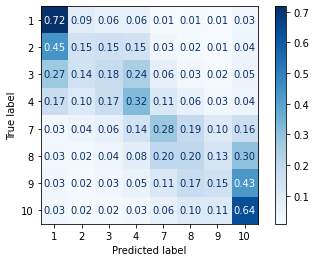

In [29]:
####################################################################
###################### DO NOT MODIFY THIS PART #####################
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


# task as regression

print("R2 score %f" % (r2_score(Y_test, Y_pred_test)))
print("MAE %f" % (mean_absolute_error(Y_test, Y_pred_test)))
print("MSE %f" % (mean_squared_error(Y_test, Y_pred_test)))
print()

# task as multiclass classification

report = classification_report(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(report)

confusion_matrix = confusion_matrix(Y_test.astype('int'), Y_pred_test_class.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(confusion_matrix)
print()

# fancy confusion matrix
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")
####################################################################

Credits:
Andrea Galassi,
Federico Ruggeri,
Paolo Torroni
(Oct 2020)